# Blobs Segmentation

In [1]:
import imagej
import scyjava as sj

# initialize imagej
ij = imagej.init(mode="headless", add_legacy=True)
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.5.0/1.53r


In [2]:
# get additional resources
HyperSphereShape = sj.jimport("net.imglib2.algorithm.neighborhood.HyperSphereShape")
Overlay = sj.jimport("ij.gui.Overlay")
Table = sj.jimport("org.scijava.table.Table")
ParticleAnalyzer = sj.jimport("ij.plugin.filter.ParticleAnalyzer")

[INFO] Verifying GIF format


[java.lang.Enum.toString] [INFO] Verifying GIF format


[INFO] Reading dimensions
[INFO] Reading data blocks


[java.lang.Enum.toString] [INFO] Reading dimensions
[java.lang.Enum.toString] [INFO] Reading data blocks


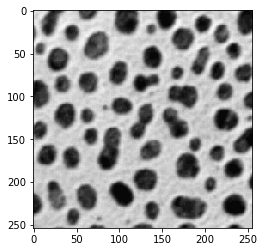

In [3]:
# Load the image
url_img = "https://imagej.nih.gov/ij/images/blobs.gif"
img_ij = ij.io().open(url_img)

# Display the image
ij.py.show(img_ij)

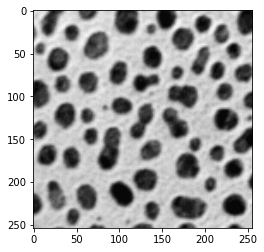

In [4]:
import matplotlib.pyplot as plt

# Send the image to Python
img_xr = ij.py.from_java(img_ij)

# Display the image
plt.imshow(img_xr)

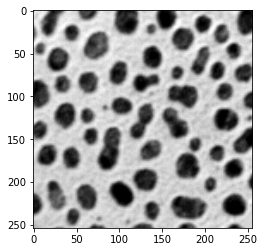

In [5]:
import cv2
import xarray as xr

img_np = cv2.cvtColor(xr.DataArray.to_numpy(img_xr), cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(img_np, "gray")

In [6]:
print(f"img_ij type: {type(img_ij)}")
print(f"img_xr type: {type(img_xr)}")
print(f"img_np type: {type(img_np)}")

img_ij type: <java class 'net.imagej.DefaultDataset'>
img_xr type: <class 'xarray.core.dataarray.DataArray'>
img_np type: <class 'numpy.ndarray'>


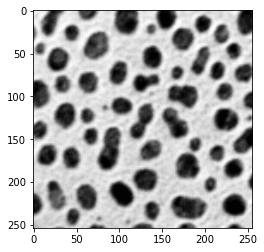

In [7]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_np)

plt.imshow(img_clahe, "gray")

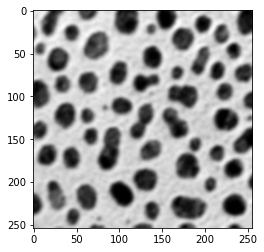

In [8]:
# GaussianBlur
img_blur = cv2.GaussianBlur(img_np, ksize=(5, 5), sigmaX=0)

plt.imshow(img_blur, "gray")

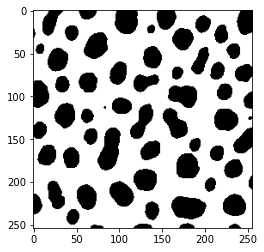

In [9]:
# threshold()
ret, img_th = cv2.threshold(img_blur, 0, 255, cv2.THRESH_OTSU)

plt.imshow(img_th, "gray")

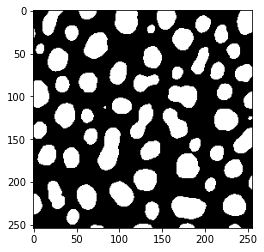

In [10]:
# inverse image
img_inv = cv2.bitwise_not(img_th)

plt.imshow(img_inv, "gray")

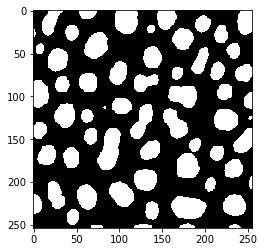

In [11]:
# Converting Python objects to Java
img_java = ij.py.to_java(img_inv)

ij.py.show(img_java, cmap="gray")

Operating in headless mode - the original ImageJ will have limited functionality.


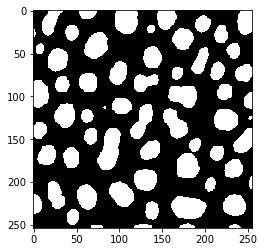

In [12]:
# convert ImgPlus to ImagePlus
img_imp = ij.py.to_imageplus(img_java)

ij.py.show(img_imp, cmap="gray")

In [13]:
# get ResultsTable and set ParticleAnalyzer
rt = ij.ResultsTable.getResultsTable()
ParticleAnalyzer.setResultsTable(rt)

# set measurements
ij.IJ.run("Set Measurements...", "area center shape")

# run the analyze particle plugin
ij.py.run_plugin(plugin="Analyze Particles...", args="clear", imp=img_imp)

Operating in headless mode - the ResultsTable class will not be fully functional.
Operating in headless mode - the IJ class will not be fully functional.


In [14]:
# convert results table -> scijava table -> pandas dataframe
sci_table = ij.convert().convert(rt, Table)
df = ij.py.from_java(sci_table)

# print dataframe
print(df)

     Area          XM          YM     Circ.        AR     Round  Solidity
0   426.0   20.575117   13.645540  0.663245  2.081601  0.480400  0.881988
1   183.0   63.521858    4.734973  0.754354  1.776324  0.562960  0.950649
2   659.0  108.812595   13.053869  0.863307  1.066680  0.937488  0.966985
3   432.0  154.972222   10.270833  0.867364  1.060849  0.942641  0.960000
4   471.0  247.385350   13.954352  0.810489  1.578974  0.633323  0.964176
..    ...         ...         ...       ...       ...       ...       ...
57  211.0   46.533175  241.007109  0.939930  1.271582  0.786422  0.944072
58   77.0  179.136364  251.668831  0.593288  3.067080  0.326043  0.900585
59   88.0  128.352273  251.795455  0.488962  3.937549  0.253965  0.936170
60   50.0  234.760000  252.000000  0.630967  2.603278  0.384131  0.909091
61   46.0   74.152174  252.391304  0.539673  4.022377  0.248609  0.893204

[62 rows x 7 columns]


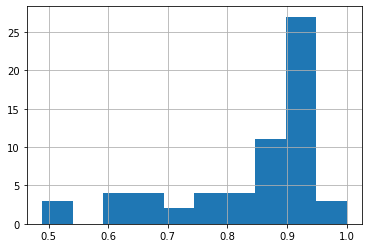

In [15]:
# display histgram of circularity

df["Circ."].hist()
plt.show()
plt.close()